# Allysa Webber

## Research questions

### Research question 1: How do housing, education, and community wellbeing differ with different community demographics? 
### Research question 2: Are there significant differences in the mean temperature values in January from 2011-2013?
### Research question 3: How do snowfall, precipitation and temperature interact with each other? Do values in the winter predict values in the summer?
### Research question 4: What is the spacial distribution of temperature and snowfall values in british columbia?

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [31]:
#import the wellbeing files
wellbeingindex = pd.read_csv('/Users/allysawebber/Documents/School/data301/project-group33/data/raw/CWindex.csv', encoding="ISO-8859-1")

In [30]:
#take a look at the different areas
wellbeingindex['CSD Name / Nom de la SDR 2011'].unique()

array(['Division No.  1, Subd. V', 'Portugal Cove South', 'Trepassey',
       ..., 'Gjoa Haven', 'Taloyoak', 'Kitikmeot, Unorganized'],
      dtype=object)

In [33]:
wellbeingindex.describe()

,CSD Code / Code de la SDR 2011,Census Population / Population de recensement 2011,GNR / TGN 2011,Income / Revenu 2011,Education / Scolarité 2011,Housing / Logement 2011,Labour Force Activity / Activité sur le marché du travail 2011,CWB / IBC 2011
count,5.253000e+03,4.417000e+03,4417.000000,3752.000000,3752.000000,3752.000000,3752.000000,4417.000000
mean,3.649022e+06,7.572630e+03,38.447272,69.635661,51.707623,90.972548,82.924574,73.063844
std,1.617802e+06,6.054266e+04,15.691078,10.595555,11.534866,10.357334,9.275051,9.303556
min,1.001101e+06,6.500000e+01,0.000000,21.000000,6.000000,27.000000,33.000000,26.000000
25%,2.438055e+06,3.950000e+02,27.400000,66.000000,46.000000,91.000000,78.750000,70.000000
50%,3.558075e+06,8.990000e+02,39.500000,71.000000,53.000000,94.000000,85.000000,75.000000
75%,4.718809e+06,2.634000e+03,49.800000,76.000000,59.000000,96.000000,89.000000,79.000000
max,6.208098e+06,2.615060e+06,88.600000,100.000000,89.000000,100.000000,100.000000,93.000000


In [33]:
#clean up the files
wellbeingindex = wellbeingindex.apply(lambda x: x.replace({'Non-Indigenous Community / Communauté non-Autochtone':'Non-Indigenous Community',
                            'First Nations Community / Communauté des Premières Nations':'First Nations Community',
                           'Inuit Community / Communauté inuite': 'Inuit Community'}, regex=True))

In [34]:
wellbeingindex=wellbeingindex.rename(columns={'Community Type / Type de communauté 2011': 'Community Type',
                            'CWB / IBC 2011': 'CWB', 'Census Population / Population de recensement 2011':'Population size',
                            'Income / Revenu 2011':'Revenue', 'Education / Scolarité 2011':'Education',
                            'Housing / Logement 2011':'Housing',
                            'CSD Name / Nom de la SDR 2011':'Area'})

In [35]:
wellbeingindex=(wellbeingindex.drop(columns=['CSD Code / Code de la SDR 2011','Labour Force Activity / Activité sur le marché du travail 2011','GNR / TGN 2011'], axis=1))

In [23]:
wellbeingindex

,Area,Population size,Revenue,Education,Housing,CWB,Community Type
0,"Division No. 1, Subd. V",NaN,NaN,NaN,NaN,NaN,Non-Indigenous Community
1,Portugal Cove South,160.0,NaN,NaN,NaN,65.0,Non-Indigenous Community
2,Trepassey,570.0,77.0,42.0,95.0,72.0,Non-Indigenous Community
3,St. Shott's,NaN,NaN,NaN,NaN,NaN,Non-Indigenous Community
4,"Division No. 1, Subd. U",1489.0,76.0,54.0,97.0,78.0,Non-Indigenous Community
...,...,...,...,...,...,...,...
5248,Umingmaktok,NaN,NaN,NaN,NaN,NaN,Inuit Community
5249,Cambridge Bay,1608.0,78.0,43.0,74.0,69.0,Inuit Community
5250,Gjoa Haven,1279.0,63.0,28.0,49.0,52.0,Inuit Community
5251,Taloyoak,899.0,58.0,20.0,60.0,51.0,Inuit Community


In [39]:
wellbeingindex['CWB'].max(),wellbeingindex['CWB'].min()

(93.0, 26.0)

### How do housing, education, and community wellbeing differ with different community demographics?


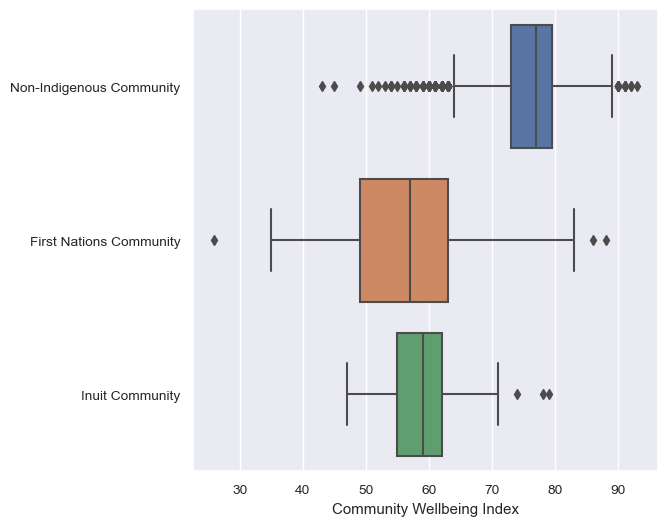

In [54]:
#visualize 
plt.figure(figsize=(6,6))
sns.set(font_scale=.9)
wellbeingindex_plot = sns.boxplot(x=wellbeingindex['CWB'],
                                    y = wellbeingindex['Community Type'],
                                     ).set(xlabel='Community Wellbeing Index', ylabel=None)

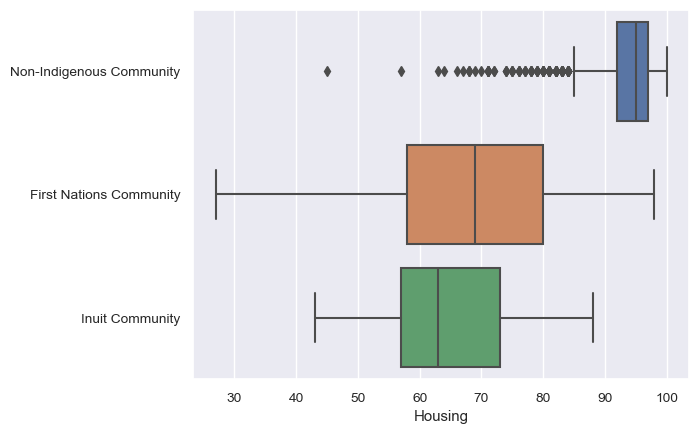

In [63]:
plot = sns.boxplot(x=wellbeingindex['Housing'],
                                    y= wellbeingindex['Community Type'],
                                     ).set(xlabel='Housing',ylabel=None)

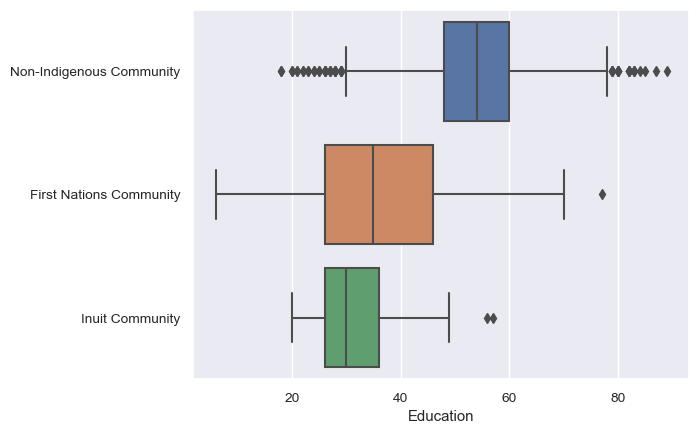

In [57]:
plot = sns.boxplot(x=wellbeingindex['Education'],
                                    y= wellbeingindex['Community Type'],
                                     ).set(xlabel='Education',ylabel=None)

### Indigenous and inuit communites experience lower community well being scores, as well as lower housing and education.  

In [82]:
#import and concat the climate files with a loop
files= (glob('/Users/allysawebber/Documents/School/data301/data/*'))
df_list=[]

for i in files:
    print(i)
    df=pd.read_csv(i)
    df['year']=i[-8:-4]
    print(df)
    df_list.append(df)
df=pd.concat(df_list)

/Users/allysawebber/Documents/School/data301/data/climate2018.csv
        Long     Lat                Stn_Name  Clim_ID Prov_or_Ter    Tm  DwTm  \
0   -123.742  48.935               CHEMAINUS  1011500          BC   5.1   0.0   
1   -124.133  48.824  COWICHAN LAKE FORESTRY  1012040          BC   3.2   0.0   
2   -124.052  48.829           LAKE COWICHAN  1012055          BC   3.8  13.0   
3   -123.226  48.425        DISCOVERY ISLAND  1012475          BC   NaN   NaN   
4   -123.439  48.432       ESQUIMALT HARBOUR  1012710          BC   6.7   0.0   
..       ...     ...                     ...      ...         ...   ...   ...   
232 -122.597  58.836           FORT NELSON A  1192946          BC -18.5   0.0   
233 -122.574  58.841             FORT NELSON  1192948          BC -18.3   0.0   
234 -130.025  58.426        DEASE LAKE (AUT)  119BLM0          BC -15.5   0.0   
235 -133.700  59.567                   ATLIN  1200560          BC -11.4   2.0   
236 -136.367  59.450           PLEASANT CAM

In [83]:
files= (glob('/Users/allysawebber/Documents/School/data301/summerdata/*'))
df2_list=[]

for i in files:
    print(i)
    df2=pd.read_csv(i)
    df2['year']=i[-8:-4]
    print(df2)
    df2_list.append(df2)
df2=pd.concat(df2_list)

/Users/allysawebber/Documents/School/data301/summerdata/summer2018.csv
         Long     Lat           Stn_Name  Clim_ID Prov_or_Ter    Tm  DwTm  \
0    -123.742  48.935          CHEMAINUS  1011500          BC  20.1   2.0   
1    -124.052  48.829      LAKE COWICHAN  1012055          BC  19.8  14.0   
2    -123.226  48.425   DISCOVERY ISLAND  1012475          BC   NaN   NaN   
3    -123.439  48.432  ESQUIMALT HARBOUR  1012710          BC  16.3   0.0   
4    -123.573  48.985      GALIANO NORTH  10130MN          BC  18.8   1.0   
...       ...     ...                ...      ...         ...   ...   ...   
1235  -60.417  53.317            GOOSE A  8501900          NL  15.4   0.0   
1236  -60.217  55.450     HOPEDALE (AUT)  8502400          NL  12.3   0.0   
1237  -55.848  52.303   MARY'S HARBOUR A  8502592          NL  15.0   7.0   
1238  -62.586  58.333             SAGLEK  8503249          NL  10.8  15.0   
1239  -66.865  52.923           WABUSH A  8504177          NL  12.8   5.0   

    

In [65]:
#make sure they all imported
df2['year'].unique()

array(['2018', '2019', '2021', '2020', '2022', '2012', '2013', '2011',
       '2014', '2015', '2017', '2016'], dtype=object)

In [44]:
#take a look at the files
df.head()

,Long,Lat,Stn_Name,Clim_ID,Prov_or_Ter,Tm,DwTm,D,Tx,DwTx,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,year
0,-123.742,48.935,CHEMAINUS,1011500,BC,5.1,0.0,NaN,11.5,0.0,...,0.0,NaN,0.0,25.0,NaN,NaN,NaN,400.2,0.0,2018
1,-124.133,48.824,COWICHAN LAKE FORESTRY,1012040,BC,3.2,0.0,-0.2,12.5,0.0,...,0.0,159.0,0.0,23.0,NaN,NaN,NaN,460.3,0.0,2018
2,-124.052,48.829,LAKE COWICHAN,1012055,BC,3.8,13.0,0.3,12.0,8.0,...,12.0,NaN,NaN,19.0,NaN,NaN,NaN,254.9,0.0,2018
3,-123.226,48.425,DISCOVERY ISLAND,1012475,BC,NaN,NaN,NaN,12.9,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
4,-123.439,48.432,ESQUIMALT HARBOUR,1012710,BC,6.7,0.0,NaN,11.9,0.0,...,0.0,NaN,NaN,21.0,NaN,NaN,NaN,351.6,0.0,2018


In [45]:
df.describe()

,Long,Lat,Tm,DwTm,D,Tx,DwTx,Tn,DwTn,S,DwS,DwP,S_G,Pd,BS,DwBS,BS%,HDD,CDD
count,6624.000000,6624.000000,6097.000000,6097.000000,1582.000000,6346.000000,6346.000000,6347.000000,6347.000000,2747.000000,2747.000000,5791.000000,3779.000000,5791.000000,9.000000,9.000000,6.000000,6097.000000,6097.0
mean,-107.643054,51.527185,-5.810792,1.963097,0.907901,5.762701,1.805862,-20.796975,1.785253,31.445650,3.037131,2.872561,24.100556,9.634778,49.322222,0.333333,79.166667,692.212810,0.0
std,22.113975,5.476269,8.992165,4.773249,2.118783,6.300098,4.545104,12.836126,4.537172,40.291872,5.996424,5.933104,30.498313,6.760172,12.950944,0.500000,23.455632,286.724159,0.0
min,-140.869000,41.949000,-36.300000,0.000000,-9.000000,-31.800000,0.000000,-53.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.500000,0.000000,39.000000,12.600000,0.0
25%,-123.459000,49.025000,-10.700000,0.000000,-0.400000,3.100000,0.000000,-31.500000,0.000000,3.000000,0.000000,0.000000,0.000000,4.000000,44.900000,0.000000,77.250000,451.200000,0.0
50%,-117.633000,50.099000,-4.700000,0.000000,0.900000,6.500000,0.000000,-21.600000,0.000000,20.800000,0.000000,0.000000,17.000000,9.000000,50.800000,0.000000,79.000000,669.900000,0.0
75%,-91.816000,53.295000,1.300000,1.000000,2.100000,10.100000,1.000000,-9.500000,1.000000,45.300000,3.000000,2.000000,37.000000,14.000000,56.700000,1.000000,87.500000,864.800000,0.0
max,-52.753000,82.500000,9.100000,30.000000,9.300000,30.000000,30.000000,4.900000,30.000000,473.000000,30.000000,30.000000,311.000000,31.000000,63.900000,1.000000,111.000000,1683.800000,0.0


In [84]:
####some cleaning
#get rid of all other provinces
df= df[df['Prov_or_Ter'].str.contains('BC')]
#drop unneeded columns, rename columns, reorder rows.  
df =(df.drop(columns=['DwTm','DwP','DwTx','DwBS','DwS','DwTn','Tx','Tn','S_G','Pd','BS','HDD','CDD','P%N','BS%','S%N','D'],axis=1))
#rename columns
df=df.rename(columns={'Tm': 'Temp','S': 'Snow','P':'Precip', 'Stn_Name':'Location', 'Clim_ID':'Climate ID', 'Prov_or_Ter':'Province'})
#reorder rows by year
df.sort_values(by='year', ascending = True, inplace = True)

In [85]:
####some cleaning
#get rid of all other provinces
df2= df2[df2['Prov_or_Ter'].str.contains('BC')]
#drop unneeded columns, rename columns, reorder rows.  
df2 =(df2.drop(columns=['DwTm','DwP','DwTx','DwBS','DwS','DwTn','Tx','Tn','S_G','Pd','BS','HDD','CDD','P%N','BS%','S%N','D','S'],axis=1))
#rename columns
df2=df2.rename(columns={'Tm': 'Temp2','P':'Precip2', 'Stn_Name':'Location', 'Clim_ID':'Climate ID', 'Prov_or_Ter':'Province'})
#reorder rows by year
df2.sort_values(by='year', ascending = True, inplace = True)

In [77]:
df2

,Long,Lat,Location,Climate ID,Province,Temp2,Precip2,year
261,-120.200,50.600,KAMLOOPS PRATT ROAD,116C8P0,BC,19.2,18.8,2011
92,-133.058,54.255,LANGARA ISLAND RCS,1054503,BC,13.1,136.1,2011
93,-132.167,54.000,MASSET A,1054925,BC,13.8,119.0,2011
94,-131.661,54.159,ROSE SPIT (AUT),1056869,BC,12.8,NaN,2011
95,-131.813,53.254,SANDSPIT A,1057050,BC,14.2,68.4,2011
...,...,...,...,...,...,...,...,...
80,-128.157,52.185,BELLA BELLA,1060815,BC,16.8,191.0,2022
81,-126.587,52.389,BELLA COOLA AIRPORT,1060844,BC,19.3,33.0,2022
82,-126.596,52.388,BELLA COOLA A,1060848,BC,19.2,NaN,2022
84,-130.638,53.493,BONILLA ISLAND,1060902,BC,14.6,81.0,2022


In [87]:
#precipitation is an object currently, convert to numeric type
df['Precip']= pd.to_numeric(df['Precip'],errors='coerce')
df2['Precip2']= pd.to_numeric(df2['Precip2'],errors='coerce')

In [91]:
#make one dataframe with summer and winter data
climatedf = pd.merge(df, df2, how="outer", on=['year'])
climatedf

,Long_x,Lat_x,Location_x,Climate ID_x,Province_x,Temp,Snow,Precip,year,Long_y,Lat_y,Location_y,Climate ID_y,Province_y,Temp2,Precip2
0,-125.767,58.930,MUNCHO LAKE,1195250,BC,-13.7,64.0,72.6,2011,-120.200,50.600,KAMLOOPS PRATT ROAD,116C8P0,BC,19.2,18.8
1,-125.767,58.930,MUNCHO LAKE,1195250,BC,-13.7,64.0,72.6,2011,-133.058,54.255,LANGARA ISLAND RCS,1054503,BC,13.1,136.1
2,-125.767,58.930,MUNCHO LAKE,1195250,BC,-13.7,64.0,72.6,2011,-132.167,54.000,MASSET A,1054925,BC,13.8,119.0
3,-125.767,58.930,MUNCHO LAKE,1195250,BC,-13.7,64.0,72.6,2011,-131.661,54.159,ROSE SPIT (AUT),1056869,BC,12.8,NaN
4,-125.767,58.930,MUNCHO LAKE,1195250,BC,-13.7,64.0,72.6,2011,-131.813,53.254,SANDSPIT A,1057050,BC,14.2,68.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
805197,-122.955,50.129,WHISTLER,1048898,BC,-0.1,15.0,16.6,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN
805198,-132.772,53.316,KINDAKUN ROCKS (AUT),1054222,BC,7.1,NaN,0.0,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN
805199,-133.058,54.255,LANGARA,1054500,BC,5.5,0.0,156.4,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN
805200,-124.500,49.834,POWELL RIVER A,1046391,BC,4.5,4.0,123.0,2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [94]:
climatedf = climatedf.drop(columns=['Climate ID_y','Province_y','Long_y','Lat_y', 'Location_y','Climate ID_x'],axis=1)
climatedf= climatedf.rename(columns={'Long_x':'Longitude',"Lat_x":'Latitude','Location_x':'Location','Province_x':'Province'})

KeyError: "['Climate ID_y', 'Province_y', 'Long_y', 'Lat_y', 'Location_y', 'Climate ID_x'] not found in axis"

In [95]:
climatedf

,Longitude,Latitude,Location,Province,Temp,Snow,Precip,year,Temp2,Precip2
0,-125.767,58.930,MUNCHO LAKE,BC,-13.7,64.0,72.6,2011,19.2,18.8
1,-125.767,58.930,MUNCHO LAKE,BC,-13.7,64.0,72.6,2011,13.1,136.1
2,-125.767,58.930,MUNCHO LAKE,BC,-13.7,64.0,72.6,2011,13.8,119.0
3,-125.767,58.930,MUNCHO LAKE,BC,-13.7,64.0,72.6,2011,12.8,NaN
4,-125.767,58.930,MUNCHO LAKE,BC,-13.7,64.0,72.6,2011,14.2,68.4
...,...,...,...,...,...,...,...,...,...,...
805197,-122.955,50.129,WHISTLER,BC,-0.1,15.0,16.6,2023,NaN,NaN
805198,-132.772,53.316,KINDAKUN ROCKS (AUT),BC,7.1,NaN,0.0,2023,NaN,NaN
805199,-133.058,54.255,LANGARA,BC,5.5,0.0,156.4,2023,NaN,NaN
805200,-124.500,49.834,POWELL RIVER A,BC,4.5,4.0,123.0,2023,NaN,NaN


In [51]:
#check min and max in the dataframe
df['Temp'].max(),df['Temp'].min()

df['Snow'].max(), df['Snow'].min()

df['Precip'].max(),  df['Precip'].max()  

(988.0, 988.0)

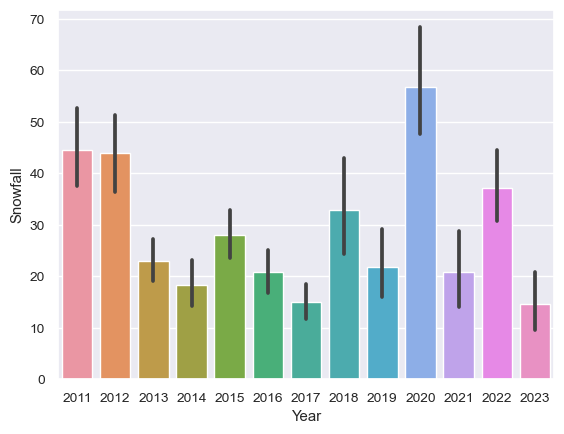

In [87]:
#look at snowfall in january across the years
sns.set(font_scale=.9)
snowfall_plot = sns.barplot(y=df['Snow'],
                                      x = df['year']
                                     ).set(ylabel='Snowfall', xlabel='Year')

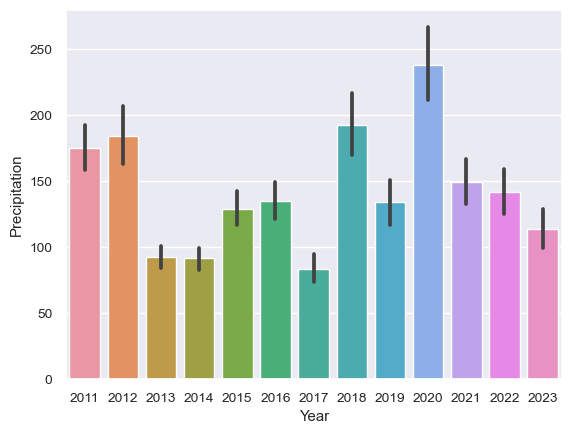

In [52]:
sns.set(font_scale=.9)
snowfall_plot = sns.barplot(y=df['Precip'],
                                      x = df['year']
                                     ).set(ylabel='Precipitation', xlabel='Year')

### Are there significant differences in the mean temperature values in January from 2011-2013?

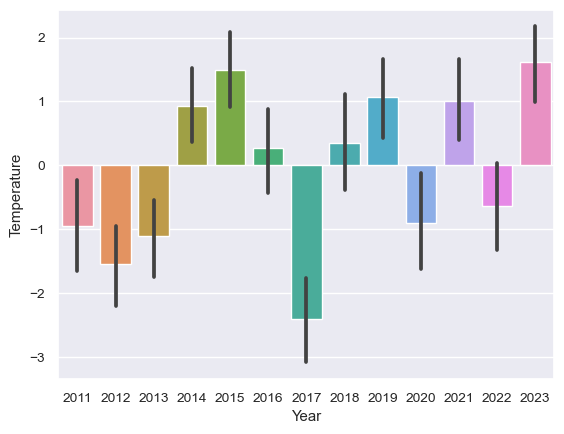

In [88]:
#look at temperature in january across the years
sns.set_style("whitegrid",{'axes.grid' : False})
sns.set(font_scale=.9)
temp_plot = sns.barplot(y=df['Temp'],
                                      x = df['year']
                                     ).set(ylabel='Temperature', xlabel='Year')

/Users/allysawebber/Documents/School/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/allysawebber/Documents/School/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/allysawebber/Documents/School/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/allysawebber/Documents/School/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height sma

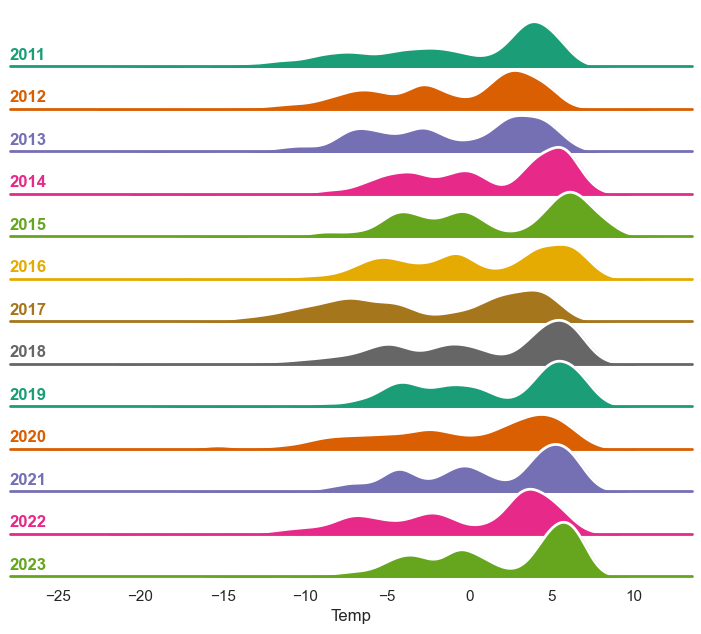

In [97]:
# try with ridgeline
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="year", hue="year", aspect=15, height=.5, palette='Dark2')

# Draw the densities in a few steps
g.map(sns.kdeplot, "Temp",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
g.map(sns.kdeplot, "Temp", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, "Temp")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)

### Temperature values do not appear to have undergone a significant change in the years shown, however they do vary from year to year. It is likely that a longer time frame is required to visualize an increase in temperature. 

### How do snowfall, precipitation and temperature interact with each other?

In [107]:
#look at how snowfall and temperature interact
meantemp = df.groupby('year')['Temp'].mean()
meantemp = pd.DataFrame(meantemp)

meansnow = df.groupby('year')['Snow'].mean()
meansnow = pd.DataFrame(meansnow)

meanprecip = df.groupby('year')['Precip'].mean()
meanprecip = pd.DataFrame(meanprecip)

meanprecip2 = climatedf.groupby('year')['Precip2'].mean()
meanprecip2 = pd.DataFrame(meanprecip2)

meantemp2 = climatedf.groupby('year')['Temp2'].mean()
meantemp2 = pd.DataFrame(meantemp2)

meansdf = pd.merge(meansnow, meantemp, how="outer", on=['year'])
meansdf['Year'] = meansdf.index

newdf = pd.merge(meansdf, meanprecip, how="outer", on=['year'])
df5 = pd.merge(newdf, meanprecip2, how='outer', on=['year'])
final = pd.merge(df5, meantemp2, how='outer', on=['year'])

final
#df5 = newdf.merge(meantemp2,on='year').merge(meanprecip2,on='year')

,Snow,Temp,Year,Precip,Precip2,Temp2
year,,,,,,
2011,44.624309,-0.945935,2011,175.250612,37.555596,16.331502
2012,43.885641,-1.539552,2012,183.993561,22.002174,17.430189
2013,22.887245,-1.113688,2013,92.328519,59.965328,17.672075
2014,18.304762,0.936466,2014,91.538235,29.881784,18.172201
2015,27.992391,1.491635,2015,129.236496,66.177395,17.367063
2016,20.772515,0.265504,2016,134.873864,42.756452,17.846091
2017,15.040127,-2.406148,2017,83.755645,28.475720,18.280000
2018,32.858394,0.355752,2018,192.882589,16.674648,17.611737
2019,21.826772,1.062281,2019,134.270183,45.433654,17.350655


In [ ]:
#does precipiation in winter coinside with precipiation in summer?

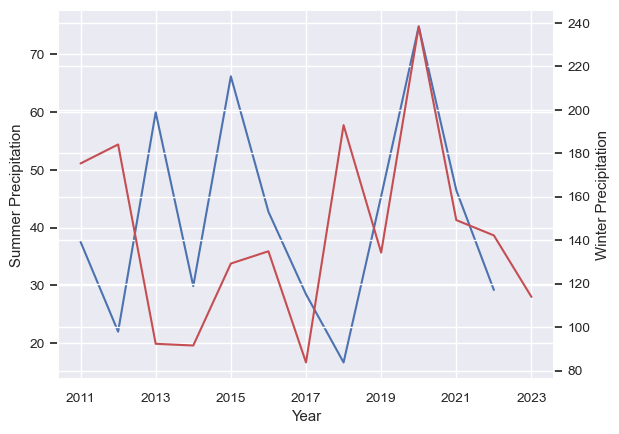

In [116]:
ax = final.plot(x="Year", y="Precip2", legend=False)
ax2 = ax.twinx()
final.plot(x="Year", y="Precip", ax=ax2, legend=False, color="r")
ax.set(xlabel='Year', ylabel='Summer Precipitation')
ax2.set(ylabel='Winter Precipitation')
plt.show()

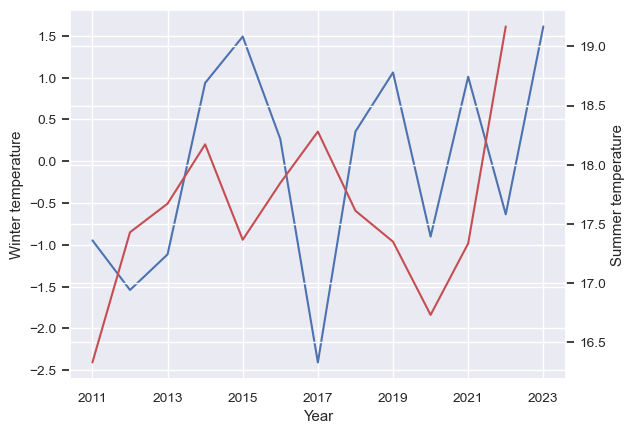

In [112]:
ax = final.plot(x="Year", y="Temp", legend=False)
ax2 = ax.twinx()
final.plot(x="Year", y="Temp2", ax=ax2, legend=False, color="r")
ax.set(xlabel='Year', ylabel='Winter temperature')
ax2.set(ylabel='Summer temperature')
plt.show()

### winter and summer values of temperature appear to coinside somewhat, with a lot of peaks and lows matching within the years. There is an odd instance in 2017 where these values are opposite one another. The same pattern appears in winter and summer precipiation, with values matching up relatively well except for in 2017. 

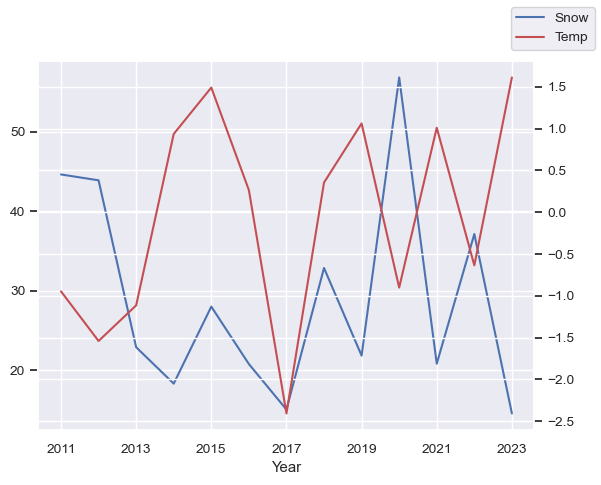

In [113]:
ax = newdf.plot(x="Year", y="Snow", legend=False)
ax2 = ax.twinx()
newdf.plot(x="Year", y="Temp", ax=ax2, legend=False, color="r")
ax.figure.legend()
plt.show()

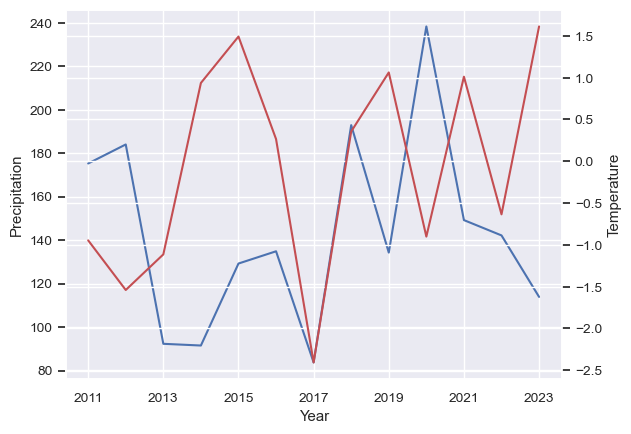

In [114]:
ax = newdf.plot(x="Year", y="Precip", legend=False)
ax2 = ax.twinx()
newdf.plot(x="Year", y="Temp", ax=ax2, legend=False, color="r")
ax.set(xlabel='Year', ylabel='Precipitation')
ax2.set(ylabel='Temperature')
plt.show()


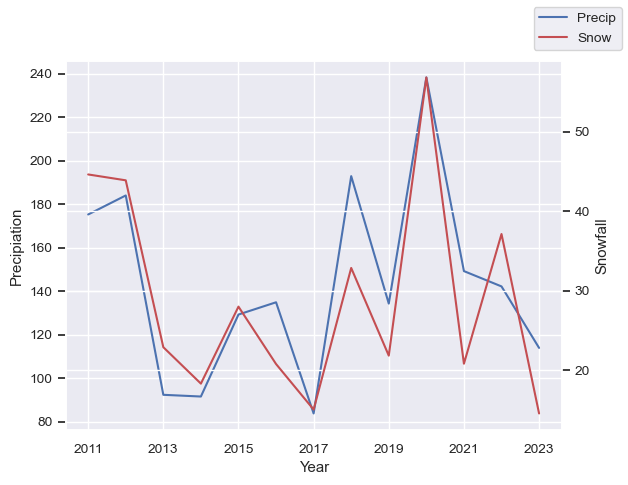

In [115]:
ax = newdf.plot(x="Year", y="Precip", legend=False)
ax2 = ax.twinx()
newdf.plot(x="Year", y="Snow", ax=ax2, legend=False, color="r")
ax.figure.legend()
ax.set(xlabel='Year', ylabel='Precipiation')
ax2.set(ylabel='Snowfall')
plt.show()

### Temperature appears to have an inverse relationship with precipitation and snowfall, while precipiation and snowfall values mirror eachother in their values

### What is the spacial distribution of temperature values across British Columbia?

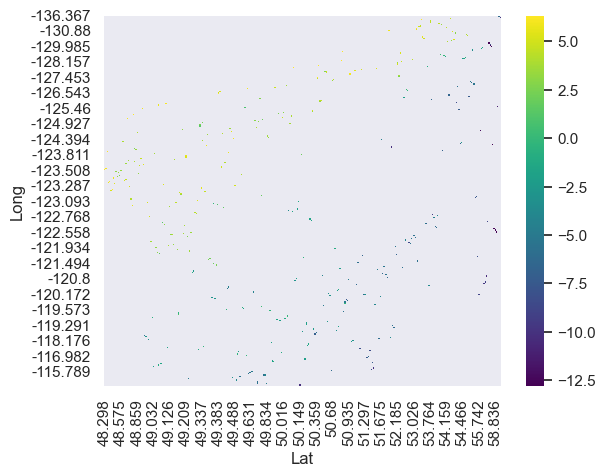

In [74]:
#try a heat map to show locations of temperatures. How has the distribution of temps changed through the years
result = df.pivot_table(index='Long', columns='Lat', values='Temp')

sns.heatmap(result, annot=False, cmap='viridis', robust=True)
plt.show()


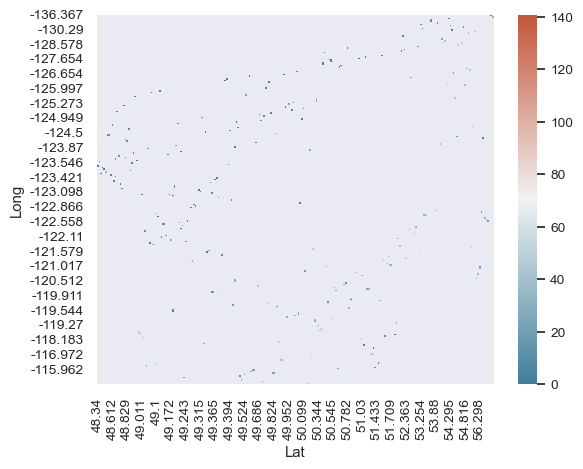

In [132]:
snow = df.reset_index().pivot_table(index='Long', columns='Lat', values='Snow')

sns.heatmap(snow, annot=False, cmap = sns.diverging_palette(230, 20, as_cmap=True), robust=True)
plt.show()

In [75]:
df.to_csv("df.csv", index=None)